In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
!pip install extra-keras-datasets

from extra_keras_datasets import emnist
(train_images, train_labels), (test_images, test_labels) = emnist.load_data(type='balanced')

INFO:root:Loading dataset = emnist


In [ ]:
idx = (train_labels == 10).reshape(train_images.shape[0])
a = train_images[idx]
idx = (train_labels == 36).reshape(train_images.shape[0])
b = train_images[idx]
f_train_images = np.concatenate((a, b), axis=0)

In [ ]:
idx = (test_labels == 10).reshape(test_images.shape[0])
a = test_images[idx]
idx = (test_labels == 36).reshape(test_images.shape[0])
b = test_images[idx]
f_test_images = np.concatenate((a, b), axis=0)

In [ ]:
idx = (train_labels == 10).reshape(train_labels.shape[0])
a = train_labels[idx]
idx = (train_labels == 36).reshape(train_labels.shape[0])
b = train_labels[idx]
f_train_labels = np.concatenate((a, b), axis=0)

In [ ]:
idx = (test_labels == 10).reshape(test_labels.shape[0])
a = test_labels[idx]
idx = (test_labels == 36).reshape(test_labels.shape[0])
b = test_labels[idx]
f_test_labels = np.concatenate((a, b), axis=0)

In [ ]:
f_train_images = f_train_images / 255.0
f_test_images = f_test_images / 255.0


In [ ]:
f_test_labels[f_test_labels == 10] = 0
f_test_labels[f_test_labels == 36] = 1

f_train_labels[f_train_labels == 10] = 0
f_train_labels[f_train_labels == 36] = 1

In [ ]:
print('f_train_images shape: {}'.format(f_train_images.shape))
print('f_test_images shape: {}'.format(f_test_images.shape))
print('f_train_labels shape: {}'.format(f_train_labels.shape))
print('f_test_labels shape: {}'.format(f_test_labels.shape))

f_train_images shape: (4800, 28, 28)
f_test_images shape: (800, 28, 28)
f_train_labels shape: (4800,)
f_test_labels shape: (800,)


In [ ]:
from random import shuffle

ind_list = [i for i in range(4800)]
shuffle(ind_list)
f_train_images = f_train_images[ind_list, :,:]
f_train_labels = f_train_labels[ind_list,]

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(f_train_images, f_train_labels, epochs=5)

Epoch 1/5
150/150 [==============================] - 0s 1ms/step - loss: 90.4549 - accuracy: 0.5000
Epoch 2/5
150/150 [==============================] - 0s 1ms/step - loss: 14.7846 - accuracy: 0.7094
Epoch 3/5
150/150 [==============================] - 0s 1ms/step - loss: 0.2296 - accuracy: 0.9450
Epoch 4/5
150/150 [==============================] - 0s 1ms/step - loss: 0.2004 - accuracy: 0.9504
Epoch 5/5
150/150 [==============================] - 0s 1ms/step - loss: 0.1845 - accuracy: 0.9494


In [ ]:
test_loss, test_acc = model.evaluate(f_test_images,  f_test_labels, verbose=1) 
print('Test accuracy:', test_acc)

25/25 [==============================] - 0s 914us/step - loss: 0.0000e+00 - accuracy: 0.5000
Test accuracy: 0.5


In [ ]:
model.save('model2.h5')
from google.colab import files
files.download("model2.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Pick a number: 1
[[0.01899511]]


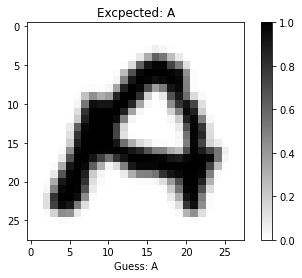

In [ ]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['A', 'a']
  prediction = model.predict(np.array([image]))
  print(prediction)
  p = np.around(prediction)
  predicted_class = class_names[int(np.max(p))]
  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 800:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = f_test_images[num]
label = f_test_labels[num]
predict(model, image, label)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = "/content/gdrive/My Drive/letter_a1.PNG"
img = Image.open(path).convert('L').resize((28, 28), Image.ANTIALIAS)
img = np.array(img)

img = img / 225.0
p = model.predict(img[None,:,:])
print(p)

[[0.]]


0


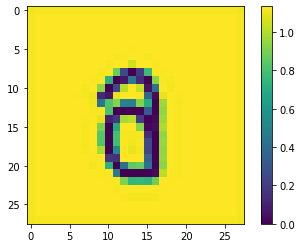

In [ ]:
x = 1
plt.figure()
plt.imshow(img)
print(f_train_labels[x])
plt.colorbar()
plt.grid(False)

plt.show()

In [ ]:
from keras_preprocessing import image

In [ ]:
images = image.load_img(path, target_size=(28, 28))    
x = image.img_to_array(images)
x = tf.image.rgb_to_grayscale(x)
x = x/255.0
x = np.expand_dims(x, axis=0)


model.predict(x)


array([[2.062014e-36]], dtype=float32)